In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('orders_dataset.csv')
df['revenue'] = df['quantity'] * df['price']
df.head()

,order_id,customer_id,city,product_category,product,quantity,price,revenue
0,1,1051,Москва,Электроника,Ноутбук,1,43158,43158
1,2,1071,СПб,Одежда,Футболка,1,12284,12284
2,3,1082,Москва,Спорттовары,Велосипед,3,5426,16278
3,4,1074,Екатеринбург,Косметика,Крем,4,3744,14976
4,5,1099,Москва,Электроника,Наушники,4,21023,84092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          300 non-null    int64 
 1   customer_id       300 non-null    int64 
 2   city              300 non-null    object
 3   product_category  300 non-null    object
 4   product           300 non-null    object
 5   quantity          300 non-null    int64 
 6   price             300 non-null    int64 
 7   revenue           300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


- Данный датафрейм имеет 300 строк
- Пропусков нет
- Типы данных соответствуют столбцам

## Какие категории товаров приносят наибольшую выручку?

In [4]:
df_revenue = df.groupby('product_category')['revenue'].sum().reset_index().sort_values('revenue', ascending=False)
df_revenue

,product_category,revenue
4,Электроника,3414716
0,Бытовая техника,3378938
3,Спорттовары,2585193
2,Одежда,1223176
1,Косметика,652221


__Вывод:__ наибольшая выручка у категории __Электроника__ - 3414716, наименьшая у __Косметика__ - 652221

## Какие города дают больше всего выручки?

In [5]:
df_city = df.groupby('city')['revenue'].sum().reset_index().sort_values('revenue', ascending=False)
df_city

,city,revenue
3,Новосибирск,2679122
4,СПб,2649287
2,Москва,2182517
1,Казань,1957185
0,Екатеринбург,1786133


__Вывод:__ больше всего выручки в городе __Новосибирск__ - 2679122, ниаменьшая в городе __Екатеринбург__ - 1786133

## У какого города средний чек выше всего?

In [6]:
df_sr = df.groupby('city').agg(average=('price', 'mean')).reset_index().sort_values('average', ascending=False)
df_sr

,city,average
1,Казань,16337.895833
3,Новосибирск,15544.075758
4,СПб,15467.690141
0,Екатеринбург,13039.509434
2,Москва,12907.758065


__Вывод:__ самый высокий средний чек в городе __Казань__ - 16337.895833

## Какие топ-5 товаров по выручке?

In [7]:
df_top_5_product = df.groupby('product')['revenue'].sum().reset_index().sort_values('revenue', ascending=False)
df_top_5_product.head() 


,product,revenue
23,Чайник,992368
11,Ноутбук,990033
17,Смартфон,967237
22,Холодильник,761746
21,Футбольный мяч,714631


__Вывод:__ топ 5 категорий по выручке: __Чайник__, __Ноутбук__, __Смартфон__, __Холодильник__ и __Футбольный мяч__

## Кто (по customer_id) в топ-10 клиентов по выручке?

In [8]:
df_customer_id = df.groupby('customer_id')['revenue'].sum().reset_index().sort_values('revenue', ascending=False)
df_customer_id.head(10)

,customer_id,revenue
54,1057,489477
58,1061,405599
7,1007,388467
71,1074,344134
0,1000,342425
15,1016,322290
31,1032,309691
49,1052,272053
18,1019,267574
84,1088,259666


## bar chart выручки по категориям

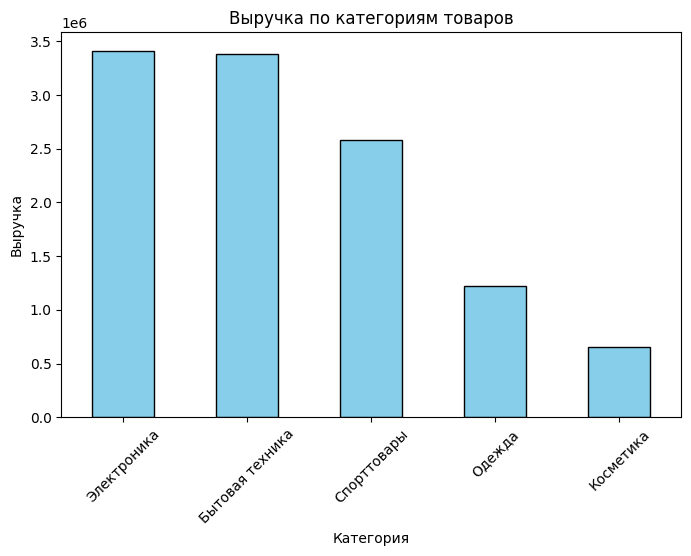

In [9]:
df_revenue = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
df_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Выручка по категориям товаров")
plt.ylabel("Выручка")
plt.xlabel("Категория")
plt.xticks(rotation=45)
plt.show()

Самая высокая выручка у Электроники, а самая низкая у Косметики

## Выручка по городам

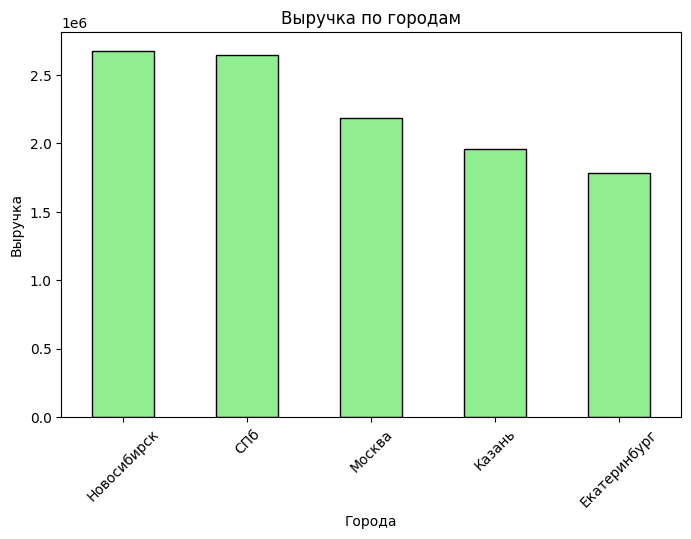

In [10]:
df_city = df.groupby('city')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
df_city.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Выручка по городам")
plt.ylabel("Выручка")
plt.xlabel("Города")
plt.xticks(rotation=45)
plt.show()

Самая высокая выручка в городе Новосибирс, самая низкая в городе Екатеренбург

## Распределение среднего чека

In [11]:
df['avg_check'] = df['revenue'] / df['quantity']

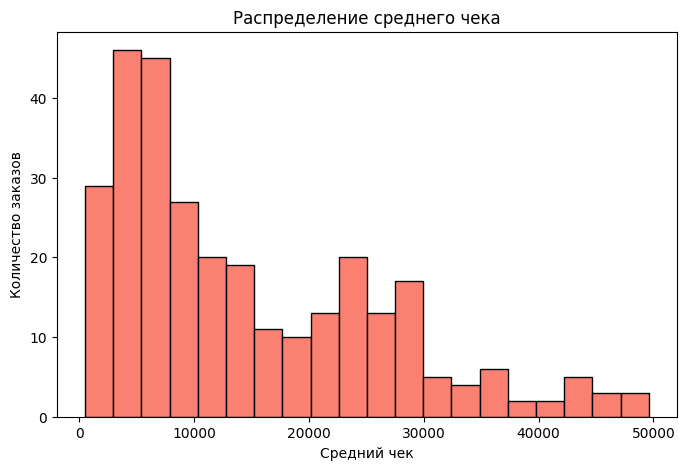

In [12]:
plt.figure(figsize=(8,5))
plt.hist(df['avg_check'], bins=20, color='salmon', edgecolor='black')
plt.title("Распределение среднего чека")
plt.xlabel("Средний чек")
plt.ylabel("Количество заказов")
plt.show()

Распределение НЕнормальное, самый частый средний чек находится в диапазоне от 2500 до 5000, очень редки средние чеки более 30000

In [13]:
df_dirty = pd.read_csv('orders_dirty.csv')
df_dirty.head()

,source,order_id,customer_id,city,product_category,product,quantity,price,notes
0,retail,1,1051,Москва,Электроника,Ноутбук,1,43 158 ₽,NaN
1,web,2,1071,спб,Одежда,Футболка,1,12284,NaN
2,web,3,1082,Москва,NaN,Велосипед,3,5426,manual edit
3,app,4,1074,Екатеринбург,Косметика,Крем,4,3744,NaN
4,web,5,1099,NaN,NaN,Наушники,4,21 023 ₽,NaN


In [14]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source            312 non-null    object
 1   order_id          312 non-null    int64 
 2   customer_id       312 non-null    int64 
 3   city              291 non-null    object
 4   product_category  297 non-null    object
 5   product           312 non-null    object
 6   quantity          312 non-null    int64 
 7   price             312 non-null    object
 8   notes             10 non-null     object
dtypes: int64(3), object(6)
memory usage: 22.1+ KB


- Всего 312 значений
- Есть пропуски, в колонке __city__, __product_category__ и __notes__(больше всего около 90%)
- Типы данных у price не соотвествуют действительности

In [15]:
df_dirty['price'] = (df_dirty['price'].astype(str)
               .str.replace('₽','', regex=False)
               .str.replace(' ','', regex=True)
               .str.strip()
               .astype(float))

In [16]:
df_dirty['city'].unique()

array(['Москва', '  спб   ', 'Екатеринбург', nan, 'СПб', 'Новосибирск',
       'Казань', '  новосибирск   ', '  nan   ', '  казань   ',
       '  москва   ', '  екатеринбург   '], dtype=object)

In [17]:
df_dirty['city'] = (df_dirty['city'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True).str.title())
df_dirty['city'].unique()

array(['Москва', 'Спб', 'Екатеринбург', 'Nan', 'Новосибирск', 'Казань'],
      dtype=object)

In [18]:
df_dirty.groupby('city')['city'].count().sort_values(ascending=False)

city
Спб             73
Новосибирск     65
Москва          59
Екатеринбург    50
Казань          43
Nan             22
Name: city, dtype: int64

In [19]:
df_dirty['city'] = df_dirty['city'].fillna('Unknown')
df_dirty['product_category'] = df_dirty['product_category'].fillna('Unknown')

In [20]:
before = len(df_dirty)
df_dirty = df_dirty.drop_duplicates()
after = len(df_dirty)
print("Удалено дублей:", before - after)

Удалено дублей: 6


In [21]:
bad_qty = df_dirty.query('quantity <= 0').shape[0]
df_dirty = df_dirty.query('quantity > 0').copy()

In [22]:
p01, p99 = df_dirty['price'].quantile([.01, .99])
df_dirty['price'] = df_dirty['price'].clip(lower=p01, upper=p99)

In [24]:
df_dirty['revenue'] = df_dirty['quantity'] * df_dirty['price']
df_dirty['avg_check'] = df_dirty['revenue'] / df_dirty['quantity']

In [26]:
del df_dirty['notes']

In [27]:
df_dirty.head()

,source,order_id,customer_id,city,product_category,product,quantity,price,revenue,avg_check
0,retail,1,1051,Москва,Электроника,Ноутбук,1,43158.0,43158.0,43158.0
1,web,2,1071,Спб,Одежда,Футболка,1,12284.0,12284.0,12284.0
2,web,3,1082,Москва,Unknown,Велосипед,3,5426.0,16278.0,5426.0
3,app,4,1074,Екатеринбург,Косметика,Крем,4,3744.0,14976.0,3744.0
4,web,5,1099,Nan,Unknown,Наушники,4,21023.0,84092.0,21023.0
